In [1]:
import os
# import badger
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
fpath = '/Users/darshika/Desktop/Research/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2' +\
        '_SOMcols_Fid_blindC_TOMO{}_Nz.asc'
fpath = os.path.join(fpath)
table_n = Table()
table_n['z'] = np.genfromtxt(fpath.format(1))[:, 0] + 0.025
table_n['n'] = np.vstack(
    [np.genfromtxt(fpath.format(i + 1))[:, 1] for i in range(5)]).T

In [21]:
#this is with spec and photo w/ Desi data
table_c = Table.read(os.path.join('/Users/darshika/Desktop/Research/som-data/trial_4/final/kids_c_0.fits'))
print(table_c[2])

     ra        dec      mag_g     mag_r     mag_i   c_deep       z_true       c_wide  z           w         w_sys
    deg        deg       mag       mag       mag                                      ""                         
----------- --------- --------- --------- --------- ------ ------------------ ------ ---- ----------------- -----
150.3778297 1.7086678 24.917452 24.472677 23.615664   1148 2.7683000564575195   5443 0.79 2.323848247528076   0.0


Tomographic bin 1
<z>: 0.257 vs. 0.478
Tomographic bin 2
<z>: 0.403 vs. 0.517
Tomographic bin 3
<z>: 0.564 vs. 0.698
Tomographic bin 4
<z>: 0.792 vs. 0.868
Tomographic bin 5
<z>: 0.984 vs. 1.053


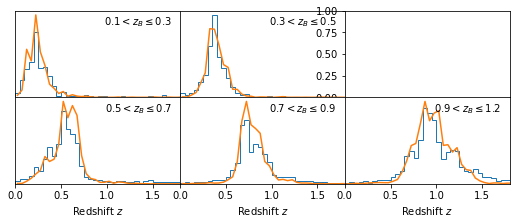

In [15]:
# fig, axarr = plt.subplots(nrows=2, ncols=3, figsize=(7, 3), sharex=True)
# axarr = axarr.flatten()

# Z_BINS = {'kids': [0.1, 0.3, 0.5, 0.7, 0.9, 1.2]}
# for i in range(5):

#     if i < 2:
#         ax = axarr[i]
#     else:
#         ax = axarr[i + 1]

#     use = ((table_c['z'] > Z_BINS['kids'][i]) &
#            (table_c['z'] <= Z_BINS['kids'][i+1]))

#     n,bins,patches = ax.hist(table_c['z_true'][use], weights=table_c['w'][use] *
#             table_c['w_sys'][use],
#             bins=table_n['z'] - np.diff(table_n['z'])[0] / 2.0,
#             histtype='step', density=True) 
    
#     ax.plot(table_n['z'], table_n['n'][:, i] / np.diff(table_n['z'])[0])
#     ax.set_xlim(0, 1.8)
#     print('Tomographic bin {}'.format(i + 1))
#     print('<z>: {:.3f} vs. {:.3f}'.format(
#         np.average(table_n['z'], weights=table_n['n'][:, i]),
#         np.average(table_c['z_true'][use], weights=table_c['w'][use] *
#                    table_c['w_sys'][use])))
#     ax.set_yticks([])
#     if i >= 2:
#         ax.set_xlabel(r'Redshift $z$')
#     ax.text(0.95, 0.95, r'${:.1f} < z_B \leq {:.1f}$'.format(
#                 Z_BINS['kids'][i], Z_BINS['kids'][i+1]),
#             transform=ax.transAxes, ha='right', va='top')
# axarr[2].axis('on')

# plt.tight_layout(pad=0.3)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('kids_nz.pdf')
# plt.savefig('kids_nz.png', dpi=300)
# #find the peak, then the find 3 sigma away to get the bins to use 


Tomographic bin 1
<z>: 0.257 vs. 0.478


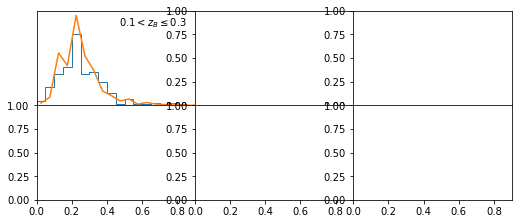

In [28]:
fig, axarr = plt.subplots(nrows=2, ncols=3, figsize=(7, 3), sharex=True)
axarr = axarr.flatten()

Z_BINS = {'kids': [0.1, 0.3, 0.5, 0.7, 0.9, 1.2]}
i = 0
if i < 2:
    ax = axarr[i]
else:
    ax = axarr[i + 1]

use = ((table_c['z'] > Z_BINS['kids'][i]) &
           (table_c['z'] <= Z_BINS['kids'][i+1]))

n,bins,patches = ax.hist(table_c['z_true'][use], weights=table_c['w'][use] *
    table_c['w_sys'][use],
    bins=table_n['z'] - np.diff(table_n['z'])[0] / 2.0,
    histtype='step', density=True) 
    
ax.plot(table_n['z'], table_n['n'][:, i] / np.diff(table_n['z'])[0])
ax.set_xlim(0, .9)
print('Tomographic bin {}'.format(i + 1))
print('<z>: {:.3f} vs. {:.3f}'.format(
    np.average(table_n['z'], weights=table_n['n'][:, i]),
    np.average(table_c['z_true'][use], weights=table_c['w'][use] *
        table_c['w_sys'][use])))
ax.set_yticks([])
if i >= 2:
    ax.set_xlabel(r'Redshift $z$')
ax.text(0.95, 0.95, r'${:.1f} < z_B \leq {:.1f}$'.format(
    Z_BINS['kids'][i], Z_BINS['kids'][i+1]),
    transform=ax.transAxes, ha='right', va='top')
axarr[2].axis('on')

plt.tight_layout(pad=0.3)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('kids_nz.pdf')
plt.savefig('kids_nz.png', dpi=300)

In [27]:
print(table_c['z_true'][use][6])

0.09399999678134918


In [15]:
print(bins[41]) #printing the edges of the bins

2.0500000000000003


In [16]:
print(n)

[3.68434885e-02 6.09323506e-02 3.18980068e-02 3.83490697e-02
 7.11406676e-02 2.76267730e-02 8.73581665e-02 1.10600301e-01
 1.18329925e-01 1.04581836e-01 2.02720684e-01 2.80091428e-01
 3.61011226e-01 8.02881107e-01 9.36434894e-01 7.57546994e-01
 1.25788507e+00 2.19203782e+00 2.03989394e+00 1.85130054e+00
 1.21673016e+00 7.12150601e-01 9.12786833e-01 9.73263738e-01
 9.41885383e-01 4.76873909e-01 3.66897323e-01 3.47557320e-01
 4.16619509e-01 3.07166979e-01 1.97593403e-01 1.85335929e-01
 1.71495149e-01 9.41604390e-02 1.18425383e-01 1.01843690e-01
 1.05565520e-01 6.29498281e-02 1.22245513e-01 9.46330114e-02
 8.09260253e-02 4.45639975e-02 5.27865726e-02 5.80736747e-02
 3.63878480e-02 2.48714770e-02 5.95225219e-02 1.26976586e-02
 2.04209882e-02 1.34437152e-02 3.21577915e-02 8.83260641e-03
 2.49055159e-02 1.29465253e-02 1.95137534e-02 3.32244445e-02
 1.59636816e-02 1.96461337e-02 1.03858349e-02 2.21927335e-02
 7.56115045e-03 9.13935642e-03 1.00866099e-02 6.16423020e-03
 2.88994325e-03 6.272752

In [17]:
#here printing the array for the galaxies which coincide with a specific bin

arr = np.digitize(table_c['z_true'],bins)
great = (np.where(arr >= 50)) #in order from lowest to highest all the indices of the galaxies that fall in bins that are greater than 50
with np.printoptions(threshold=np.inf):
    print(great)

# with np.printoptions(threshold=np.inf):
#     print(arr)
# print(max(arr))

(array([    2,    15,    30,    38,    39,    78,    86,   116,   133,
         146,   166,   174,   183,   192,   195,   196,   204,   238,
         269,   310,   322,   390,   399,   403,   417,   426,   450,
         458,   481,   491,   505,   521,   525,   526,   533,   543,
         555,   560,   567,   592,   616,   617,   634,   644,   667,
         716,   740,   746,   747,   757,   777,   782,   821,   828,
         853,   861,   871,   921,   940,   955,  1010,  1037,  1043,
        1057,  1058,  1072,  1075,  1124,  1129,  1130,  1137,  1152,
        1209,  1232,  1237,  1242,  1243,  1271,  1298,  1304,  1389,
        1392,  1451,  1452,  1457,  1465,  1471,  1478,  1488,  1523,
        1556,  1574,  1575,  1587,  1609,  1613,  1639,  1647,  1666,
        1667,  1672,  1676,  1704,  1712,  1721,  1726,  1760,  1778,
        1779,  1787,  1804,  1817,  1837,  1873,  1943,  1972,  1974,
        1977,  1979,  1989,  1991,  1996,  2023,  2025,  2026,  2029,
        2053,  2061

In [18]:

with np.printoptions(threshold=np.inf):
    print(arr)


[41 17 56 ... 11 16  7]
[ 41  17  56  20  45  49   8  22  46  17  17  16  30  41  11  67  19  17
  13  10  25  32  15  17  12  40  16  14  15  31  55  10   7  16  13  13
  15  14  52  51  34  13  42   8  12  14  28  30   9   8   3  13   8  34
   3  16  11  13   7   8  11  11  21  27  18   8  19  13  16  22   3  21
  21  15   5   7  32  27  51  16  18   2  13  11  10   8  70  29   3  11
  42  12  29  25  15  10  15  15   6  15  16  19  30  32  15  15  16  15
  10  13  29  14  19  13  13  18  57   5   9  22  17  14  20  23   6   3
  36  25  39  11  45  14  36  60  25  15  42  11  20  31  13  11  12  11
   7  18  56  11  15  13  14  15  13   4   7  15  22  13   6  11  25  18
   7   6  10  15  56  15  32  40  40  15  13  26  58  13  21  18  15  16
  21  11  17  52  45  17  22  17  17  19  13  16  55  20  13  55  50  14
  29  12  14  12  16  17  52  35  14  14  15  35  15   9  12  18  12  30
  15  15  14  19  14  33   3  20  15  16  11  12  15  13  13   8  19  33
  11  14  21   4  50  20   